In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import shapiro
from scipy.stats import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [ ]:
df=pd.read_csv("6 class csv.csv")

In [ ]:
print("Dimension of data=>",df.shape)

Dimension of data=> (240, 7)


In [ ]:
print("Basic information about the data:-", "\n")
print("*"*50)
df.info()

Basic information about the data:- 

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
print("Checking unique values for each feature:-","\n")
print("-"*40)
df.nunique()

Checking unique values for each feature:- 

----------------------------------------


Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
Spectral Class              7
dtype: int64

In [ ]:
print("Checking null values in entire data:-","\n")
print("-"*35)
df.isnull().sum().sum()

Checking null values in entire data:- 

-----------------------------------


0

Không có giá trị Null

In [ ]:
print("Checking duplicates in entire data:-","\n")
print("-"*35)
df.duplicated().sum()

Checking duplicates in entire data:- 

-----------------------------------


0

Không có giá trị trùng lặp

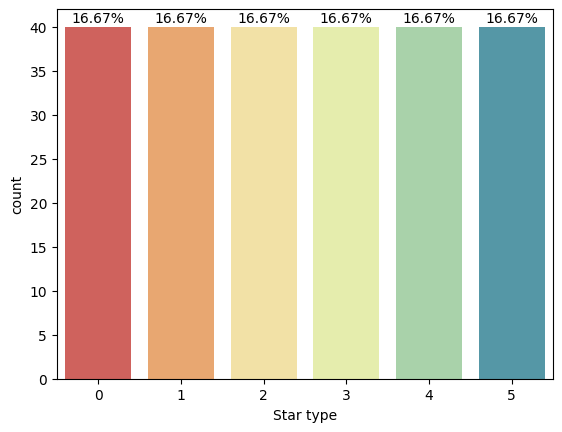

In [ ]:
ax=sns.countplot(data=df, x='Star type', palette="Spectral")

percentages=df['Star type'].value_counts()/len(df)*100

#Annotate bars with percentages
for i,p in enumerate(ax.patches):
   height=p.get_height()
   ax.text(p.get_x()+p.get_width()/2, height+0.5, f'{percentages[i]:.2f}%' , ha="center")

# Show the plot
plt.show()

Star type cần bằng về số lượng

Mật độ xác suất của các giá trị nhiệt độ

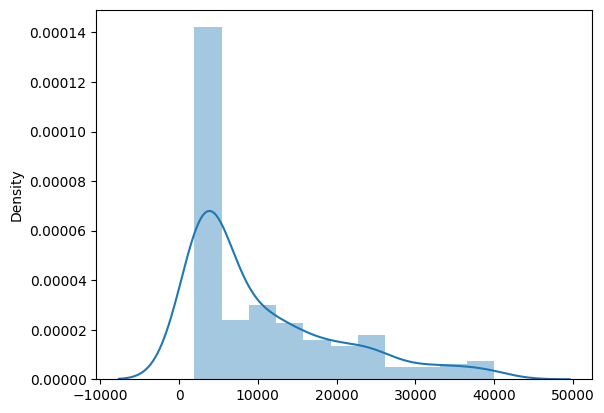

In [ ]:
sns.distplot( x=df["Temperature (K)"])
plt.show()

•	Biểu đồ phân bố nhiệt độ theo các loại sao

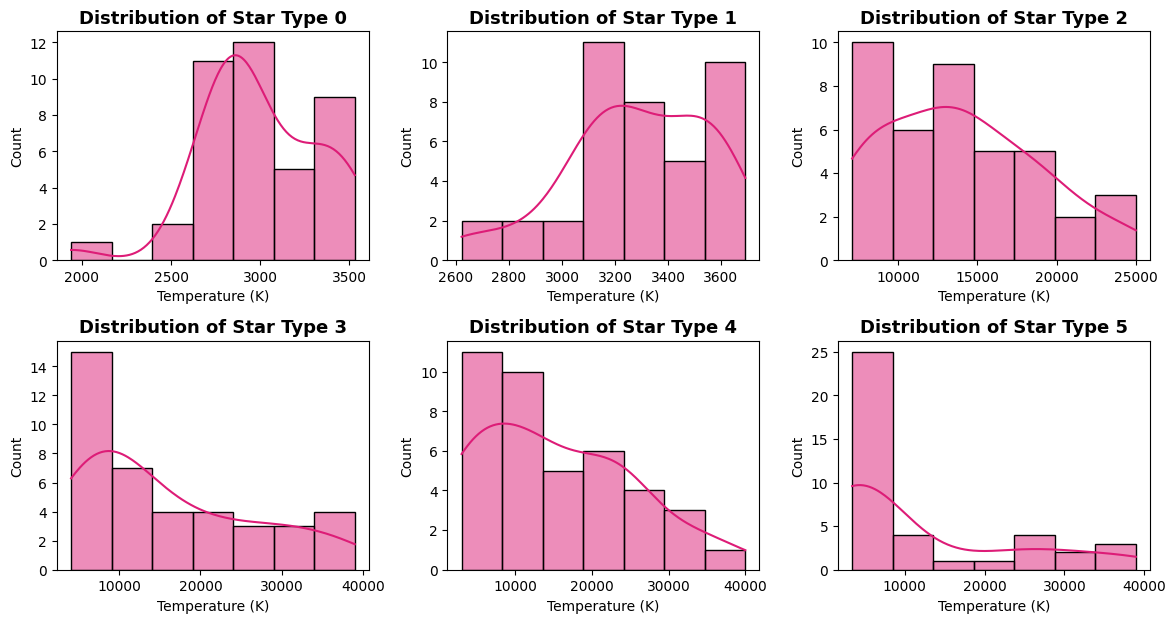

In [ ]:
unique_star_types = df["Star type"].unique()

plt.figure(figsize=(12, 9))

for i, star_type in enumerate(unique_star_types):
    filtered_df = df[df["Star type"] == star_type]
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=filtered_df, x="Temperature (K)", kde=True, color="#dd1c77")
    plt.title(f"Distribution of Star Type {star_type}", fontweight="bold", size=13)

plt.tight_layout()
plt.show()

Dựa vào độ sáng và nhiệt độ , bán kính và nhiệt độ

In [ ]:
num_cols=['Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star type']
num_cols

['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']

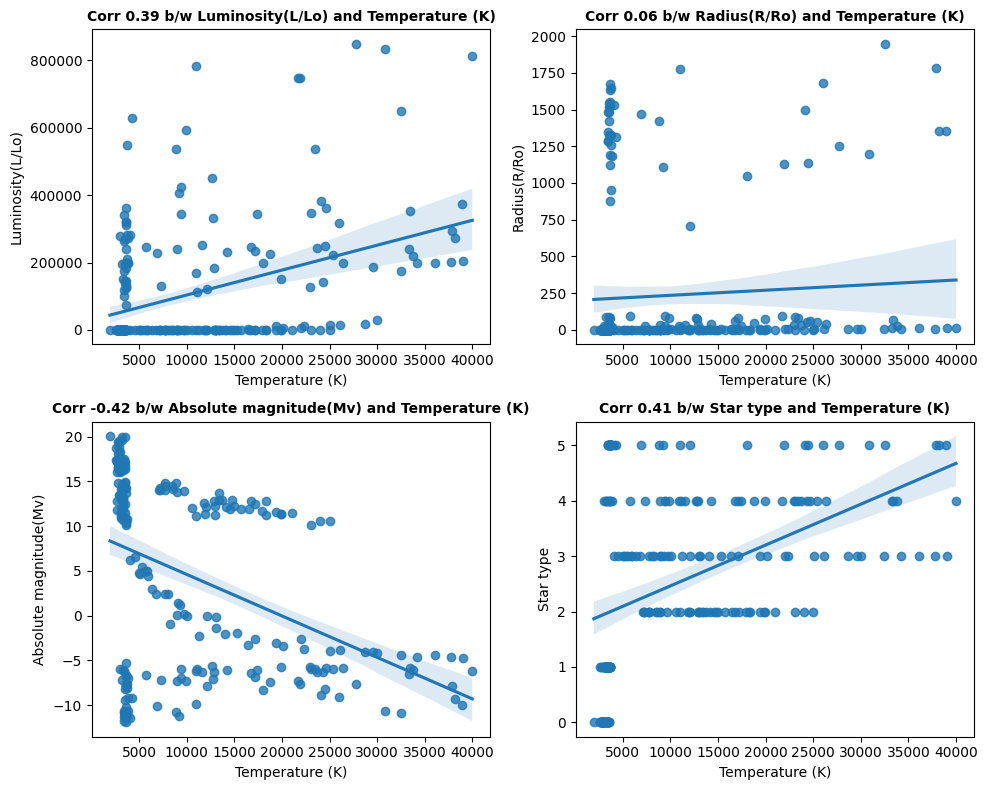

In [ ]:
plt.figure(figsize=(10, 8))  # Increase the figure size for better visibility

# Assuming you want to create a 3x3 grid of plots
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.regplot(data=df, x="Temperature (K)", y=col)
    corr = round(df[[col, "Temperature (K)"]].corr().iloc[0, 1], 2)
    plt.title(f"Corr {corr} b/w {col} and Temperature (K)", fontweight="bold", fontsize=10)

plt.tight_layout()
plt.show()

Sao nóng nhất là: Main Sequence (3), SuperGiants(4), HyperGiants(5)

Dựa vào màu sắc và nhiệt độ, lớp quang phổ và nhiệt độ

In [ ]:
cat_cols=df.select_dtypes(include="object").columns.to_list()
cat_cols

['Star color', 'Spectral Class']

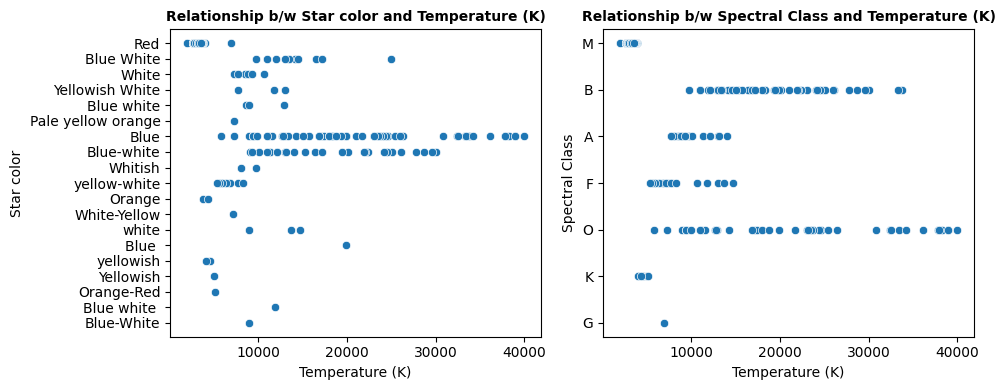

In [ ]:
plt.figure(figsize=(10, 4))  # Increase the figure size for better visibility

# Assuming you want to create a 3x3 grid of plots
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x="Temperature (K)", y=col)
    plt.title(f"Relationship b/w {col} and Temperature (K)", fontweight="bold", fontsize=10)

plt.tight_layout()
plt.show()

Ngôi sao nóng nhất là blue và lớp quang phổ nóng nhất là O.

In [ ]:
con_cols=['Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)']

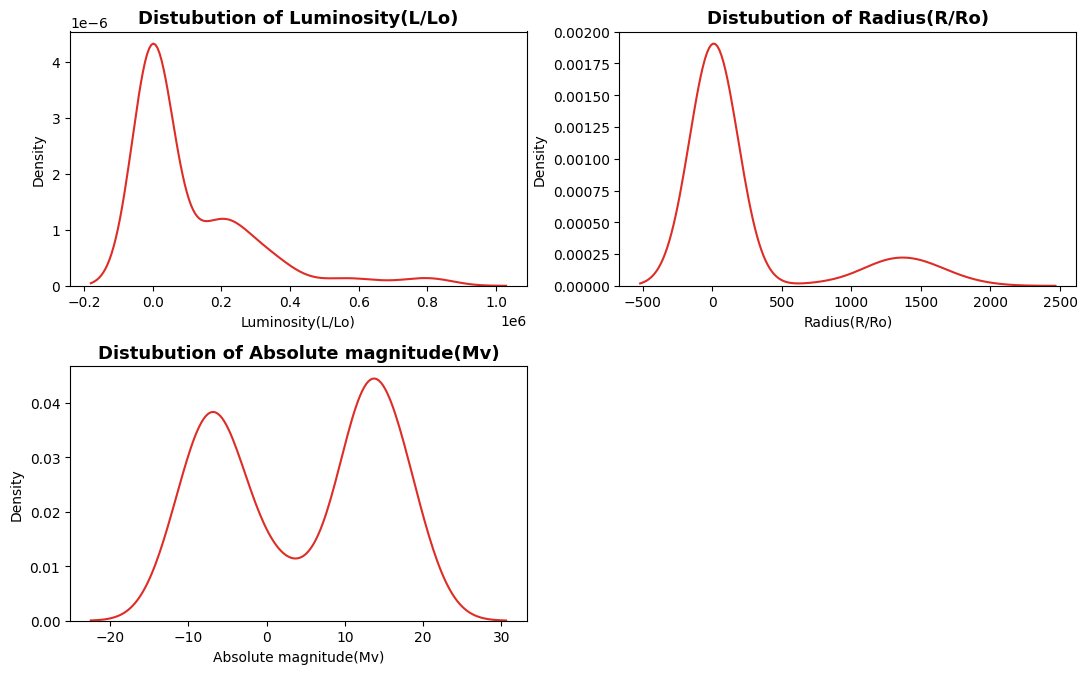

In [ ]:
plt.figure(figsize=(11,7))

for i, cols in enumerate(con_cols):
  plt.subplot(2, 2, i+1)
  sns.kdeplot(data=df, x=cols, color="#de2d26")
  plt.title(f"Distubution of {cols}", fontweight="black", size=13 )
plt.tight_layout()
plt.show()

Dựa vào độ sáng tuyệt đối

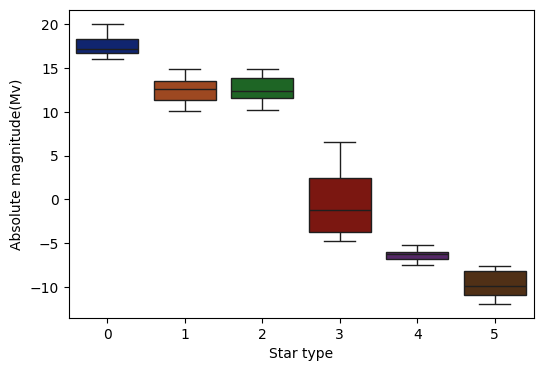

In [ ]:

plt.figure(figsize=(6,4))

# Create the box plot with the specified figsize
sns.boxplot(data=df, y = 'Absolute magnitude(Mv)', x = 'Star type', palette="dark")

# Show the figure
plt.show()

Ngôi sao Nâu (Brown Dwarf - 0) có độ sáng tuyệt đối cao nhất trong tất cả các loại sao

Dựa vào yếu tố màu sắc


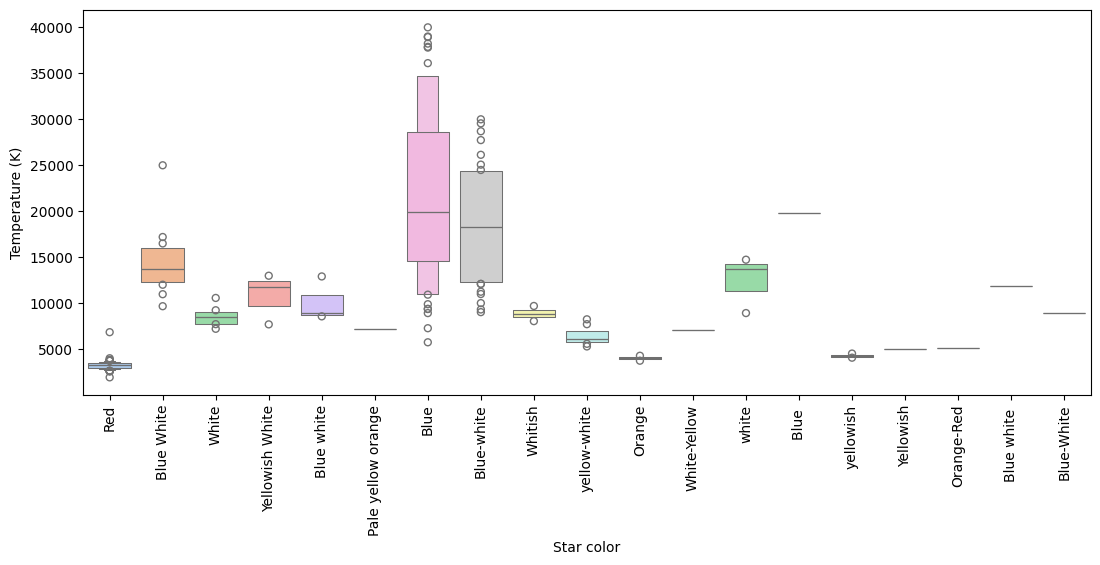

In [ ]:
figure= plt.figure(figsize=(13,5))
sns.boxenplot(x='Star color',y='Temperature (K)',data=df, palette="pastel")
plt.xticks(rotation=90)
plt.show()

Phân tích biểu đồ phân bố của toàn bộ yếu tố

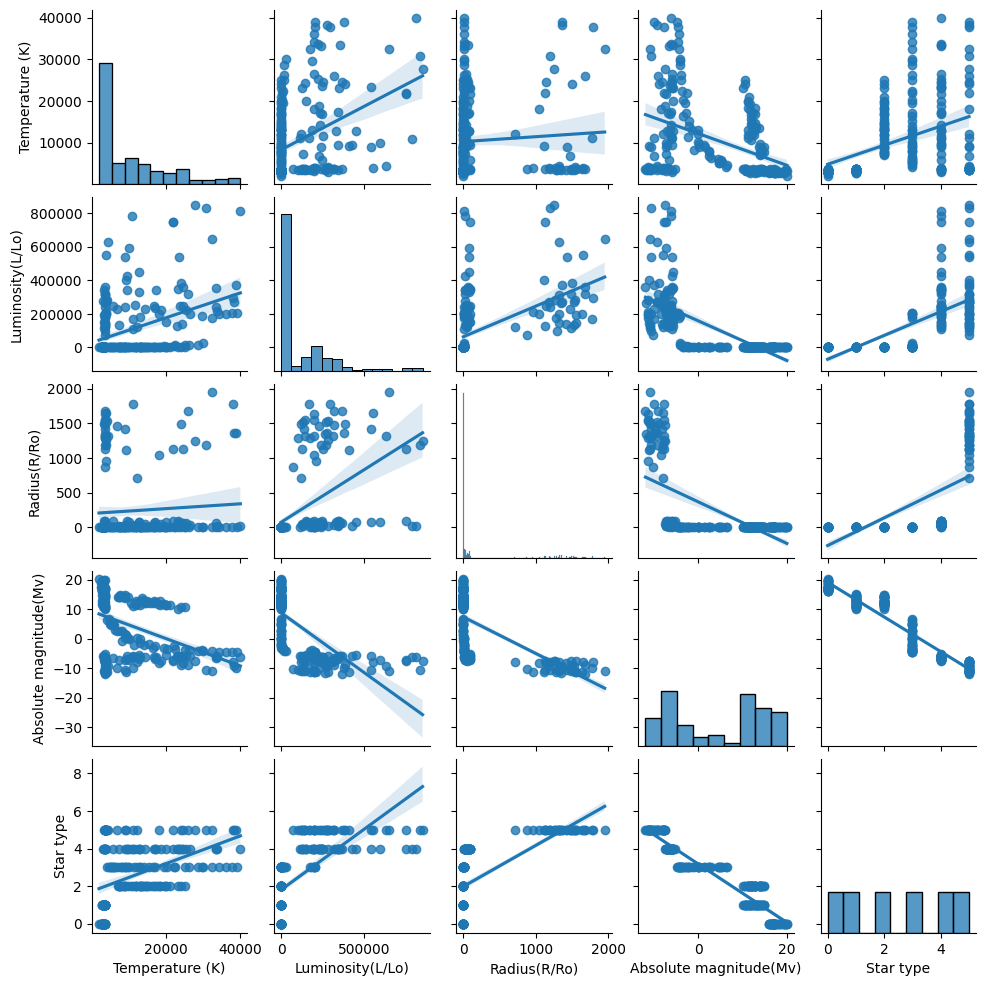

In [ ]:
sns.pairplot(df, palette="pastel", kind="reg", height=2)
plt.show()

<Axes: >

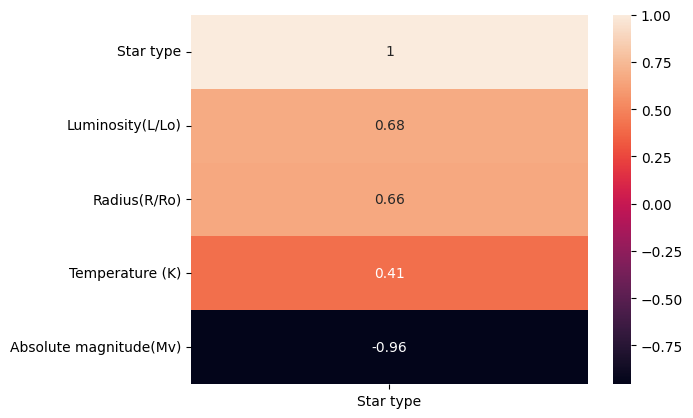

In [ ]:
num_cols=["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type"]
corr=df[num_cols].corr()["Star type"].to_frame().sort_values(by="Star type", ascending=False)
corr
sns.heatmap(corr, annot=True)

Các đặc trưng Luminosity và Radius có mối tương quan mạnh với việc phận loại sao. Trong khi, nhiệt độ có mối tương quan trung bình và Độ sáng tuyệt đối có mối tương quan thấp với nó.

**Xây dựng mô hình**

Mã hóa cột spectral class

In [ ]:
#=OrdinalEncoder(categories=[['M', 'B', 'A', 'F', 'O', 'K', 'G']], dtype="int")

In [ ]:
#oe.fit(df[["Spectral Class"]])

In [ ]:
#df["Spectral Class"]=oe.transform(df[["Spectral Class"]])

In [ ]:
#df.tail()

In [ ]:
#df=pd.get_dummies(df, columns=["Star color"], drop_first=True, dtype="int")

In [ ]:
#df.tail()

XDMH

In [ ]:
# Đọc tệp CSV
df = pd.read_csv('6 class csv.csv')

# Kiểm tra tên cột
print(df.columns)

# Mã hóa các biến phân loại
label_encoders = {}
for column in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,11,0
238,9235,404940.000000,1112.0000,-11.23,5,11,0


In [ ]:
X= df.drop(columns=["Star type"], axis=1)
y=df["Star type"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.7, random_state=43)

In [ ]:
print("x_train==>", X_train.shape)
print("x_test==>",X_test.shape)
print("y_train==>",y_train.shape)
print("y_test==>",y_test.shape)

x_train==> (48, 6)
x_test==> (192, 6)
y_train==> (48,)
y_test==> (192,)


In [ ]:
models = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    RandomForestClassifier(n_jobs=1,n_estimators=5,max_depth=5),
    DecisionTreeClassifier(criterion="entropy", splitter="random",max_depth=5),
    GaussianNB()
]

algorithms = [
    'LogisticRegression', 'SVC', 'KNeighborsClassifier',
    'RandomForestClassifier',
    'DecisionTreeClassifier', 'GaussianNB'
]

In [ ]:
results = []

for model, algorithm in zip(models, algorithms):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict the target values on the test data
    pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, pred)

    results.append({'Algorithm': algorithm, 'Accuracy': accuracy})

diff_models= pd.DataFrame(results)
diff_models.sort_values('Accuracy',ascending=False).reset_index(drop=True)

,Algorithm,Accuracy
0,RandomForestClassifier,0.976190
1,DecisionTreeClassifier,0.946429
2,GaussianNB,0.880952
3,LogisticRegression,0.767857
4,KNeighborsClassifier,0.607143
5,SVC,0.380952


In [ ]:
print(y_test)

150    3
82     2
142    2
174    5
200    2
      ..
206    2
3      0
160    4
181    0
104    4
Name: Star type, Length: 192, dtype: int64


In [ ]:
final=pd.DataFrame({"Actual":y_test,"Predict":pred})
final

,Actual,Predict
150,3,3
82,2,2
142,2,2
174,5,5
200,2,2
...,...,...
173,5,5
24,2,2
70,1,1
221,4,4


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        31
           1       1.00      0.56      0.72        32
           2       0.78      1.00      0.87        31
           3       1.00      0.42      0.60        33
           4       0.76      1.00      0.86        34
           5       1.00      1.00      1.00        31

    accuracy                           0.82       192
   macro avg       0.87      0.83      0.81       192
weighted avg       0.87      0.82      0.81       192



In [ ]:
# Tạo một mẫu dữ liệu test
new_data = {
    'Temperature (K)': [8000],
    'Luminosity (L/Lo)': [2.0],
    'Radius (R/Ro)': [1.8],
    'Absolute magnitude (Mv)': [-2],
    'Star color': ['White'],
    'Spectral Class': ['B']
}

# Chuyển đổi mẫu dữ liệu mới thành DataFrame
new_df = pd.DataFrame(new_data)

# Mã hóa các biến phân loại cho mẫu dữ liệu mới
for column in ['Star color', 'Spectral Class']:
    new_df[column] = label_encoders[column].transform(new_df[column])

# Mã hóa biến 'Star color' bằng get_dummies để đảm bảo khớp với dữ liệu huấn luyện
new_df = pd.get_dummies(new_df, columns=['Star color'])

# Đảm bảo các cột trong new_df khớp với các cột trong dữ liệu huấn luyện
missing_cols = set(X_train.columns) - set(new_df.columns)
for col in missing_cols:
    new_df[col] = 0
new_df = new_df[X_train.columns]

# Dự đoán loại sao cho mẫu dữ liệu mới
predicted_star_type = model.predict(new_df)

print("Predicted Star Type:", predicted_star_type[0])

Predicted Star Type: 2
